In [1]:
import graphing as g
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from dataHandlr import *

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
test = pd.read_csv('Terrestrial/MTrackJAC04_09b_201511_1832.mraw.csv')

In [3]:
test = test[test.TID == 3]

In [4]:
test2 = test.filter(regex='(pixel|fr)')

In [5]:
test2

,x [pixel],y [pixel],t [fr],Len [pixel],D2S [pixel],D2R [pixel],D2P [pixel],v [pixel/fr]
120,498.833,288.833,885,0.000,0.000,NaN,NaN,NaN
121,498.833,288.833,886,0.000,0.000,NaN,0.000,0.000
122,502.167,287.500,887,3.590,3.590,NaN,3.590,3.590
123,500.167,287.833,888,5.618,1.667,NaN,2.028,2.028
124,497.167,289.167,889,8.901,1.700,NaN,3.283,3.283
...,...,...,...,...,...,...,...,...
212,67.833,287.833,977,490.558,431.001,NaN,5.735,5.735
213,61.500,290.833,978,497.566,437.338,NaN,7.008,7.008
214,61.167,290.500,979,498.038,437.670,NaN,0.471,0.471
215,59.833,288.500,980,500.441,439.000,NaN,2.404,2.404


In [6]:
test2['time'] = test['t [fr]']/500

/home/talcat/.virtualenvs/cricketfrog/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
test2

,x [pixel],y [pixel],t [fr],Len [pixel],D2S [pixel],D2R [pixel],D2P [pixel],v [pixel/fr],time
120,498.833,288.833,885,0.000,0.000,NaN,NaN,NaN,1.770
121,498.833,288.833,886,0.000,0.000,NaN,0.000,0.000,1.772
122,502.167,287.500,887,3.590,3.590,NaN,3.590,3.590,1.774
123,500.167,287.833,888,5.618,1.667,NaN,2.028,2.028,1.776
124,497.167,289.167,889,8.901,1.700,NaN,3.283,3.283,1.778
...,...,...,...,...,...,...,...,...,...
212,67.833,287.833,977,490.558,431.001,NaN,5.735,5.735,1.954
213,61.500,290.833,978,497.566,437.338,NaN,7.008,7.008,1.956
214,61.167,290.500,979,498.038,437.670,NaN,0.471,0.471,1.958
215,59.833,288.500,980,500.441,439.000,NaN,2.404,2.404,1.960


In [8]:
AC04_09b_all = test2

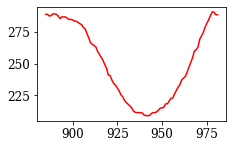

In [9]:
plt.plot(AC04_09b_all['t [fr]'], AC04_09b_all['y [pixel]'], 'r-')

In [10]:
AC04_09b_x_fix = -test2['x [pixel]'] + test2['x [pixel]'].max()
AC04_09b_y_fix=  -test2['y [pixel]'] + test2['y [pixel]'].max()
AC04_09b_time_fix = (AC04_09b_all['t [fr]'] - AC04_09b_all['t [fr]'].min())/500

Text(0, 0.5, 'dist (px)')

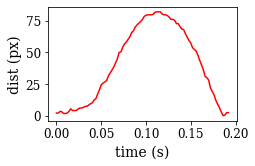

In [11]:
plt.plot(AC04_09b_time_fix, AC04_09b_y_fix, 'r-')
plt.xlabel('time (s)')
plt.ylabel('dist (px)')

In [12]:
PREF_Scale = .0294
AC04_09b_x_cm = AC04_09b_x_fix *PREF_Scale
AC04_09b_x_cm_sm = get_smooth_data(AC04_09b_x_cm, 500)

AC04_09b_y_cm = AC04_09b_y_fix*PREF_Scale
AC04_09b_y_cm_sm = get_smooth_data(AC04_09b_y_cm, 500)

Text(0, 0.5, 'range (cm)')

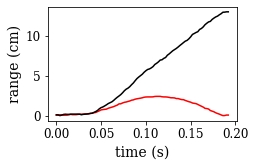

In [13]:
plt.plot(AC04_09b_time_fix, AC04_09b_y_cm, 'r-')
plt.xlabel('time (s)')
plt.ylabel('height (cm)')

plt.plot(AC04_09b_time_fix, AC04_09b_x_cm, 'k-')
plt.xlabel('time (s)')
plt.ylabel('range (cm)')

Text(0, 0.5, 'height (cm)')

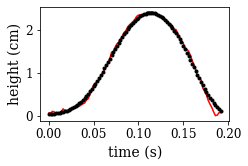

In [102]:
plt.plot(AC04_09b_time_fix, AC04_09b_y_cm, 'r-')
plt.plot(AC04_09b_time_fix, AC04_09b_y_cm_sm, 'k.')
plt.xlabel('time (s)')
plt.ylabel('height (cm)')

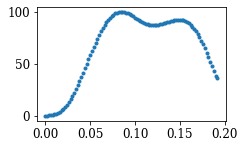

In [103]:
vx = np.gradient(AC04_09b_x_cm_sm, AC04_09b_time_fix)
vy = np.gradient(AC04_09b_y_cm_sm, AC04_09b_time_fix)
plt.plot( AC04_09b_time_fix, vx, '.')

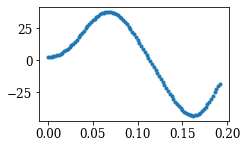

In [104]:

plt.plot( AC04_09b_time_fix, vy, '.')

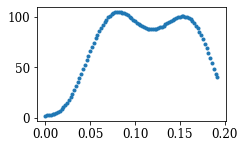

In [105]:
plt.plot( AC04_09b_time_fix, np.sqrt(vy**2 + vx**2), '.')

In [14]:
vx = np.gradient(AC04_09b_x_cm_sm, AC04_09b_time_fix)

In [15]:
vy = np.gradient(AC04_09b_y_cm_sm, AC04_09b_time_fix)

In [107]:
vang = np.rad2deg(np.arctan2(vy, vx))

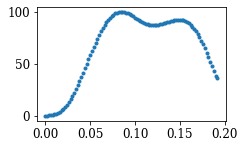

In [106]:
plt.plot( AC04_09b_time_fix, vx, '.')

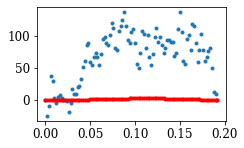

In [99]:
plt.plot( AC04_09b_time_fix, vy, '.')
plt.plot(AC04_09b_time_fix,AC04_09b_y_cm, 'r.' )

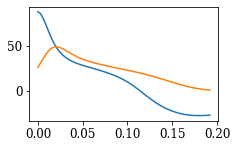

In [113]:
plt.plot(AC04_09b_time_fix, vang)
plt.plot(AC04_09b_time_fix, np.rad2deg(np.arctan2(AC04_09b_y_cm_sm, AC04_09b_x_cm_sm)))

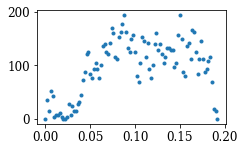

In [101]:
plt.plot( AC04_09b_time_fix, np.sqrt(vx**2 + vy**2), '.')
#plt.plot(AC04_09b_time_fix,AC04_09b_y_cm, 'r.' )

In [21]:
#Get max velocivyt and vang
Vtot = np.sqrt(vx**2 + vy**2)
Vm = np.sqrt(vx**2 + vy**2).max()

In [22]:
Vm_idx = list(Vtot).index(Vm)

In [23]:
Vm_idx

41

In [24]:
Vm_ang = vang[Vm_idx]

In [25]:
Vm_ang

18.124580466387627

In [84]:
Vm_avg = np.mean(Vtot[:Vm_idx])
Vm_avg

48.516776947087635

In [85]:
Vm_ang_avg = np.mean(vang[:Vm_idx])
Vm_ang_avg

40.05641687043481

In [26]:
#ActualH = 3.01
#AcutalR = 14.38
theight = AC04_09b_y_cm.max()
trange = AC04_09b_x_cm.max()

In [27]:
theight, trange

(2.410800000000001, 13.004619599999998)

In [28]:
#Given point n - point 1, what gives the closest vmax?

In [29]:
print("Predicted Ange: %f" %np.rad2deg(np.arctan(theight*4/trange)))

Predicted Ange: 36.557715


In [117]:
len(vx)

97

In [30]:
#print('Predicted Height: %f \n Predicted Range: %f' %(Vtot**2*np.sin))

TypeError: unsupported operand type(s) for *: 'float' and 'numpy.ufunc'

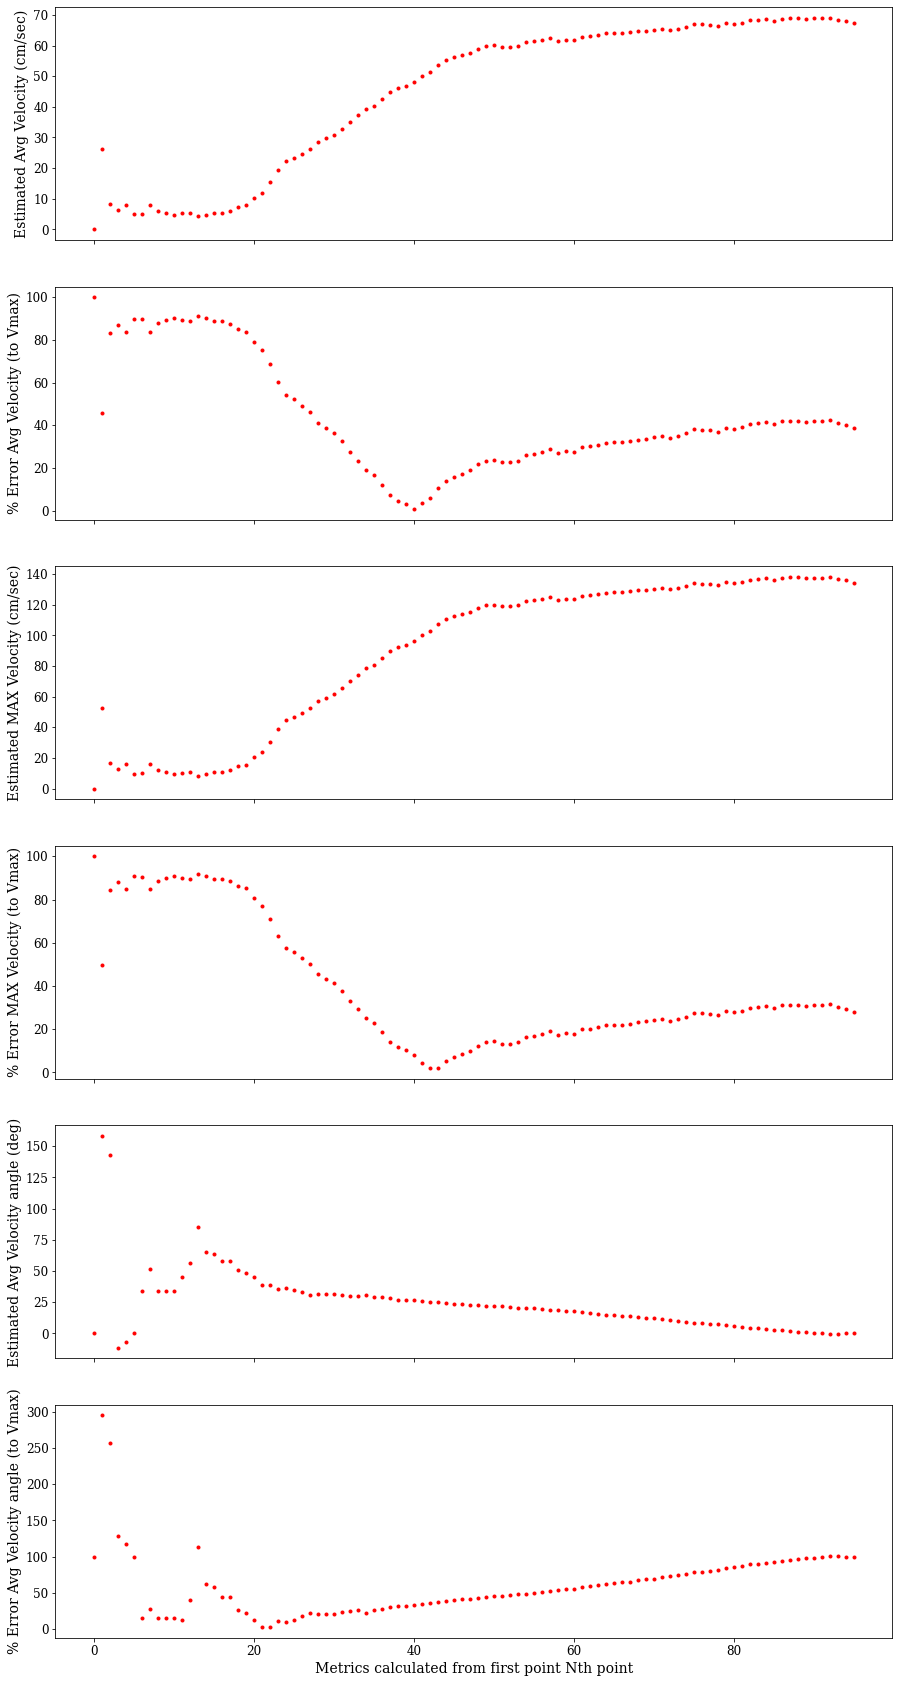

In [140]:
#raw_vtot = np.sqrt(AC04_09b_y_cm**2 + AC04_09b_x_cm**2)
NUM = 96

tot_estang = []
tot_estv = []
AC04_09b_x_cm = list(AC04_09b_x_cm)
AC04_09b_y_cm = list(AC04_09b_y_cm)
AC04_09b_time_fix = list(AC04_09b_time_fix)
for i in range(NUM):
    est_del_x = AC04_09b_x_cm[i+1] - AC04_09b_x_cm[0]
    est_del_y = AC04_09b_y_cm[i+1] - AC04_09b_y_cm[0]
    est_del_t = AC04_09b_time_fix[i+1]
    estv = np.sqrt(est_del_x**2 + est_del_y**2)/est_del_t
    est_ang = np.rad2deg(np.arctan2(est_del_y/est_del_t, est_del_x/est_del_t))
    tot_estang += [est_ang]
    tot_estv += [estv]

fig, ax = plt.subplots(nrows=6, sharex=True, figsize=(15, 30))
ax[0].plot(range(NUM), tot_estv, 'r.')
ax[1].plot(range(NUM), np.abs(Vm_avg-tot_estv)/Vm_avg*100, 'r.')

ax[2].plot(range(NUM), [2*x for x in tot_estv], 'r.')
ax[3].plot(range(NUM), np.abs(Vm-[2*x for x in tot_estv])/Vm*100, 'r.')

ax[4].plot(range(NUM), tot_estang, 'r.')
ax[5].plot(range(NUM), np.abs(Vm_ang_avg-tot_estang)/Vm_ang_avg*100, 'r.')

ax[0].set_ylabel("Estimated Avg Velocity (cm/sec)")
ax[1].set_ylabel("% Error Avg Velocity (to Vmax)")   
ax[2].set_ylabel("Estimated MAX Velocity (cm/sec)")
ax[3].set_ylabel("% Error MAX Velocity (to Vmax)")   

ax[4].set_ylabel("Estimated Avg Velocity angle (deg)")
ax[5].set_ylabel("% Error Avg Velocity angle (to Vmax)")   
ax[5].set_xlabel('Metrics calculated from first point Nth point')

fig.savefig('jakeplot1.png')

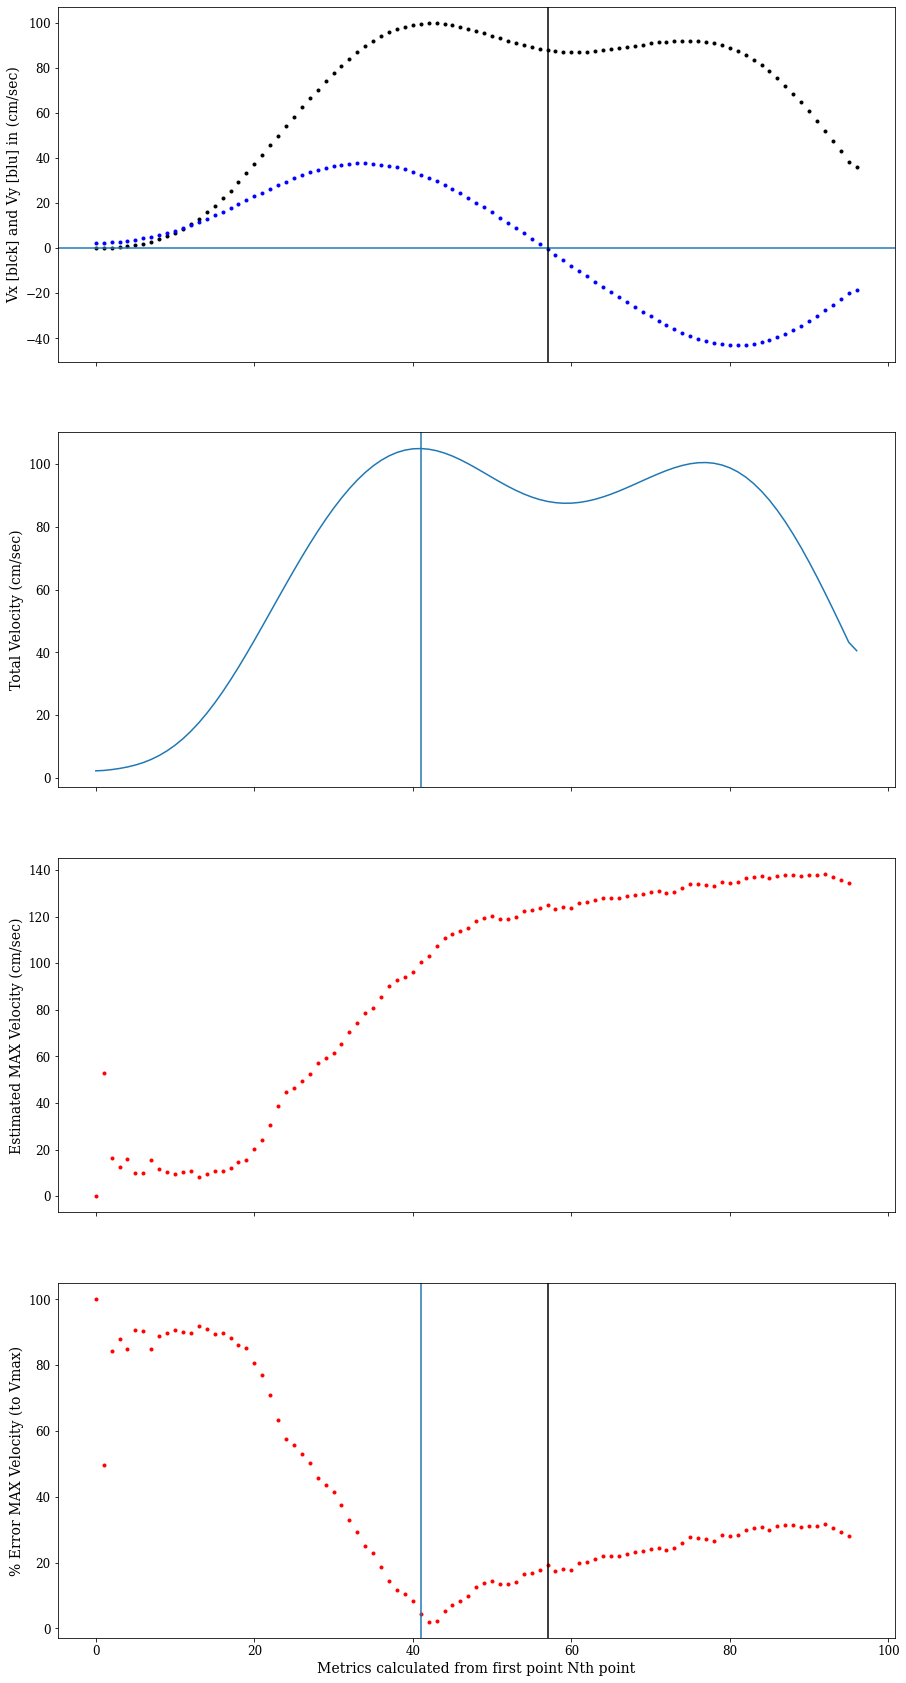

In [141]:

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(15, 30))
ax[0].plot(range(len(vx)), vx, 'k.')
ax[0].plot(range(len(vy)), vy, 'b.')
ax[1].plot(range(len(Vtot)), Vtot)
ax[1].axvline(Vm_idx)
ax[2].plot(range(NUM), [2*x for x in tot_estv], 'r.')
ax[3].plot(range(NUM), np.abs(Vm-[2*x for x in tot_estv])/Vm*100, 'r.')
ax[3].axvline(Vm_idx)
ax[0].set_ylabel('Vx [blck] and Vy [blu] in (cm/sec)')
ax[0].axhline(0)
ax[0].axvline(np.where(AC04_09b_y_cm_sm== AC04_09b_y_cm_sm.max()), c='k')
ax[3].axvline(np.where(AC04_09b_y_cm_sm== AC04_09b_y_cm_sm.max()), c='k')
ax[1].set_ylabel('Total Velocity (cm/sec)')
ax[2].set_ylabel("Estimated MAX Velocity (cm/sec)")
ax[3].set_ylabel("% Error MAX Velocity (to Vmax)")  
ax[3].set_xlabel('Metrics calculated from first point Nth point')

plt.savefig('jakeplot3.png')

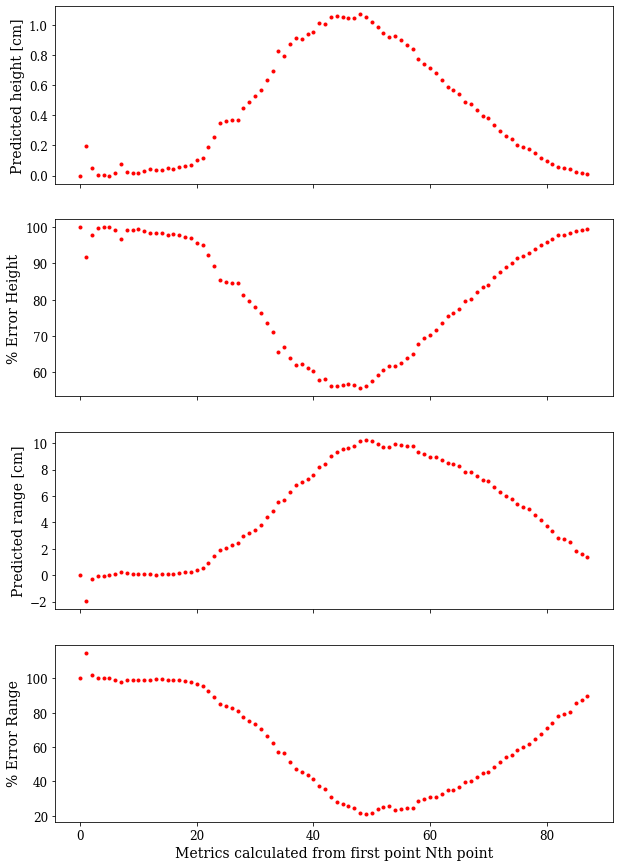

In [142]:
#raw_vtot = np.sqrt(AC04_09b_y_cm**2 + AC04_09b_x_cm**2)
NUM=88

tot_estang = []
tot_estv = []
est_height = []
est_range = []

AC04_09b_x_cm = list(AC04_09b_x_cm)
AC04_09b_y_cm = list(AC04_09b_y_cm)
AC04_09b_time_fix = list(AC04_09b_time_fix)
for i in range(NUM):
    est_del_x = AC04_09b_x_cm[i+1] - AC04_09b_x_cm[0]
    est_del_y = AC04_09b_y_cm[i+1] - AC04_09b_y_cm[0]
    est_del_t = AC04_09b_time_fix[i+1]
    estv_avg = np.sqrt(est_del_x**2 + est_del_y**2)/est_del_t
    estv_max = estv_avg*2
    est_ang = (np.arctan2(est_del_y, est_del_x))
    est_h = estv_max**2 * np.sin(est_ang)**2/(2 * 980.7)
    est_r = estv_max**2 * np.sin(2*est_ang)/(980.7)
    tot_estang += [est_ang]
    tot_estv += [estv]
    est_height += [est_h]
    est_range += [est_r]

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(10, 15))
ax[0].plot(range(NUM), est_height, 'r.')
ax[0].set_ylabel('Predicted height [cm]')
ax[1].plot(range(NUM), (theight-est_height)/theight*100, 'r.')
ax[1].set_ylabel('% Error Height')
ax[2].plot(range(NUM),est_range, 'r.')
ax[2].set_ylabel('Predicted range [cm]')
ax[3].plot(range(NUM), (trange-est_range)/trange*100, 'r.')
ax[3].set_ylabel('% Error Range')
ax[3].set_xlabel('Metrics calculated from first point Nth point')

fig.savefig('jakeplot2.png')

In [83]:
fig.savefig( 'ack.png')

In [ ]:
#raw_vtot = np.sqrt(AC04_09b_y_cm**2 + AC04_09b_x_cm**2)
NUM=88

tot_estang = []
tot_estv = []
est_height = []
est_range = []

AC04_09b_x_cm = list(AC04_09b_x_cm)
AC04_09b_y_cm = list(AC04_09b_y_cm)
AC04_09b_time_fix = list(AC04_09b_time_fix)
for i in range(NUM):
    est_del_vx = np.gradient(AC04_09b_x_cm_sm[:i+1], AC04_09b_time_fix[:i+1])
    est_del_vy = np.gradient(AC04_09b_y_cm_sm[:i+1], AC04_09b_time_fix[:i+1])
    #est_del_t = AC04_09b_time_fix[i+1]
    estv = np.sqrt(est_del_vy**2 + est_del_vx
    est_ang = (np.arctan2(est_del_y, est_del_x))
    est_h = estv**2 * np.sin(est_ang)**2/(2 * 980.7)
    est_r = estv**2 * np.sin(2*est_ang)/(980.7)
    tot_estang += [est_ang]
    tot_estv += [estv]
    est_height += [est_h]
    est_range += [est_r]

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(10, 8))
ax[0].plot(range(NUM), est_height, 'r.')
ax[1].plot(range(NUM), (theight-est_height)/theight, 'r.')
ax[2].plot(range(NUM),est_range, 'r.')
ax[3].plot(range(NUM), (trange-est_range)/trange, 'r.')